Consigna:

Evaluar los datos, realizando un análisis descriptivo y evaluar una serie de modelos de clasificación y elegir el que mejor resultados obtiene prediciendo la columna 21 que representa si se suscribe al servicio correspondiente.

# Imports

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# auto eda
import sweetviz as sv

# modelado
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler

# árbol
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# random forest
from sklearn.ensemble import RandomForestClassifier

# lgbm
import lightgbm as lgb

In [2]:
# parameters
pd.options.display.max_columns = 500

# Read data

In [3]:
# reading data
df = pd.read_csv('bank-additional-full.csv', delimiter=";")
df=df.drop(['duration'], axis=1)

Eliminamos la variable "duración" porque no será conocida hasta finalizar la llamada por lo que va a generar ruido en nuestros datos y ajustarán mal los modelos

In [4]:
# df dimentions
df.shape

(41188, 20)

In [5]:
# preview
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
# basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

## Análisis descriptivo

In [7]:
# descriptive statistics
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
df['y'].value_counts(normalize=True)

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64

La variable respuesta está altamente desbalanceada

## AutoEDA

SweetViz sirve para generar una primera versión de EDA en dos líneas de código. La salida es un archivo html con la información de las variables, los cruces entre ellas y un análisis de asociación/correlación

In [9]:
sv_report = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)

In [10]:
sv_report.show_html("eda_challenge.html")

Report eda_challenge_rocking.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Auto-EDA con respuesta

In [11]:
sv_report_target_var = sv.analyze(df, target_feat="y")

                                             |          | [  0%]   00:00 -> (? left)

In [12]:
sv_report_target_var.show_html("eda_target_var_challenge.html")

Report eda_target_var_challenge_rocking.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Hay muchos valores "unknown" en diferentes variables del dataset. Se puede analizar si existe algún patrón para intentar imputarlas

## Análisis exploratorio

In [13]:
# agrupo edad
df['edad_agrupada'] = pd.cut(df['age'], bins=[0, 30, 40, 50, 60, np.inf], 
                         labels=['<30', '30-40', '40-50', '50-60', '60+'])

df['edad_agrupada'] = df['edad_agrupada'].astype('object')

In [14]:
# cruzamos variables
pd.crosstab(df['edad_agrupada'], df['job']).reset_index()

job,edad_agrupada,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,30-40,4658,3753,571,327,1090,32,534,1615,133,3199,406,67
1,40-50,2373,2776,466,322,899,85,380,988,6,1540,285,120
2,50-60,1198,1214,273,298,639,920,238,449,0,805,147,89
3,60+,47,20,8,54,30,678,9,2,0,34,7,21
4,<30,2146,1491,138,59,266,5,260,915,736,1165,169,33


Edad y trabajo están asociadas (según autoeda)

El grupo >60 años tiene cais toda su presencia en "retired". Es viable imputar su trabajo tomando eso en cuenta

In [15]:
# por lógica los trabajos están relacionado con sus estudios, vemos si se puede imputar algo
pd.crosstab(df['education'], df['job']).reset_index()

job,education,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,basic.4y,77,2318,137,474,100,597,93,132,26,58,112,52
1,basic.6y,151,1426,71,77,85,75,25,226,13,87,34,22
2,basic.9y,499,3623,210,94,166,145,220,388,99,384,186,31
3,high.school,3329,878,234,174,298,276,118,2682,357,873,259,37
4,illiterate,1,8,2,1,0,3,3,0,0,0,0,0
5,professional.course,363,453,135,59,89,241,168,218,43,3320,142,12
6,university.degree,5753,94,610,139,2063,285,765,173,170,1809,262,45
7,unknown,249,454,57,42,123,98,29,150,167,212,19,131


Imputaciones a llevar a cabo:

- si es mayor a 60 años y no sabemos su trabajo, trabajo => retirado
- si su educación es basic.4y, basic.6y o basic.9y y no sabemos su trabajo => blue-collar
- si no sabemos su educación y trabaja en management, educación => university.degree
- si no sabemos su educación y trabaja en housemaid, education => basic.4y
- si no sabemos su educación y trabaja en services, education => high.school  

Con esto logramos reducir la cantidad de campos sin info

## Preprocesamiento de variables

In [16]:
df.loc[(df['age']>60) & (df['job']=='unknown'), 'job']='retired'
df.loc[(df['education'].isin(['basic.4y', 'basic.6y', 'basic.9y'])), 'job']='blue-collar'
df.loc[(df['education']=='unknown') & (df['job']=='management'), 'education']='university-degree'
df.loc[(df['education']=='unknown') & (df['job']=='housemaid'), 'education']='basic.4y'
df.loc[(df['education']=='unknown') & (df['job']=='services'), 'education']='high-school'

In [17]:
# creo variable binaria para saber si el cliente fue contactado previamente (sin importar días)
df['previously_contacted'] = 0
df.loc[df['pdays']!=999, 'previously_contacted']=1
df['previously_contacted'] = df['previously_contacted'].astype('object')

Notas:

Se agruparon las edades en edad_agrupada  
Se creó la variable binaria "previously_contacted"

## Modelado

In [18]:
df['y'] = df['y'].map({'yes':1, 'no':0})

In [19]:
# creo una lista con las variables tipo object
categorical_columns = df.select_dtypes(include=['object']).columns

# define la transformación. Convierte todos los valores de las variables categóricas en columnas
# de tipo int con valores binarios (1 y 0)

# Uso OneHotEncoder de Sklearn porque maneja mejor los campos sin info y se relaciona mejor con 
# otras herramientas de sklearn

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_columns)
    ],
    remainder='passthrough'  # Deja las columnas no categóricas como están
)

df_encoded = preprocessor.fit_transform(df)

encoded_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)

df_encoded = pd.DataFrame(df_encoded, columns=list(encoded_columns) + list(df.select_dtypes(exclude=['object']).columns))

# print(df_encoded)

In [20]:
X = df_encoded.copy()
X = X.drop('y', axis=1)
y = df_encoded['y']

# Dividí de manera estratificada para preservar la distribución de la variable Y en todos los subset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [21]:
print("Distribución de clases en el conjunto original:")
print(df_encoded['y'].value_counts(normalize=True))

print("\nDistribución de clases en el conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True))

print("\nDistribución de clases en el conjunto de prueba:")
print(y_test.value_counts(normalize=True))

Distribución de clases en el conjunto original:
y
0.0    0.887346
1.0    0.112654
Name: proportion, dtype: float64

Distribución de clases en el conjunto de entrenamiento:
y
0.0    0.887343
1.0    0.112657
Name: proportion, dtype: float64

Distribución de clases en el conjunto de prueba:
y
0.0    0.887351
1.0    0.112649
Name: proportion, dtype: float64


### Regresión Logística

In [22]:
# escalo los datos (al estar desbalanceados el modelo podría ajustar mal)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# ajustar el modelo
LR = LogisticRegression(random_state=42, max_iter=200)

LR.fit(X_train_scaled, y_train)

test_pred = LR.predict(X_test_scaled)

In [24]:
# print matriz de confusión
conf_matrix_logreg = confusion_matrix(y_test, test_pred)
display( pd.DataFrame(conf_matrix_logreg, columns=['Predicted Negative', 'Predicted Positive'], index=['True Negative', 'True Positive']))

,Predicted Negative,Predicted Positive
True Negative,10829,136
True Positive,1084,308


In [25]:
# print métricas varias. Importa el F1 (más alto mejor)
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     10965
         1.0       0.69      0.22      0.34      1392

    accuracy                           0.90     12357
   macro avg       0.80      0.60      0.64     12357
weighted avg       0.88      0.90      0.88     12357



Nos interesa fijarnos en F1 porque es calculado a partir de la precisión y el recall, que son dos métricas para medir la relación  
entre true positive y predicted positive (en este problema no nos interesan las predicciones negativas, queremos que SÍ se suscriban)  

El modelo es  efectivo en predecir la clase negativa (0) como podemos ver en la la matriz de confusión, la precisión y el recall (y por consecuencia el F1).  
No está prediciendo correctamente lo que buscamos, que es la clase positiva (1). Tiene un F1 muy bajo

### Árbol 

In [26]:
# Definir hiperparámetros
# Ambos criterios tienen el objetivo de crear divisiones que aumenten la homogeneidad de las clases
params_tree_train = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4],
    'min_samples_split': [30, 60, 90],
    'min_samples_leaf': [30, 60, 90],
}

# inicializar el árbol
clf = DecisionTreeClassifier(class_weight="balanced", random_state=42)

# optimizar F1
grid_search = GridSearchCV(estimator=clf, param_grid=params_tree_train, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_clf = grid_search.best_estimator_
best_f1 = grid_search.best_score_

# hago predicciones sobre el conjunto de test
y_pred = best_clf.predict(X_test)

display(best_clf)

DecisionTreeClassifier(class_weight='balanced', max_depth=4,
                       min_samples_leaf=30, min_samples_split=30,
                       random_state=42)

In [27]:
# matriz de confusión arbol
conf_matrix_tree = confusion_matrix(y_test, y_pred, labels=best_clf.classes_)
display( pd.DataFrame(conf_matrix_tree, columns=['Predicted Negative', 'Predicted Positive'], index=['True Negative', 'True Positive']))

,Predicted Negative,Predicted Positive
True Negative,9571,1394
True Positive,527,865


In [28]:
# f1 árbol
print(f"El F1 del árbol es: {best_f1:.2f}")

El F1 del árbol es: 0.46


Otra vez vemos un bajo poder predictivo para los casos positivos. Siendo el f1-score nuestra principal métrica de interés,  
es recomendable explorar otros enfoques para mejorar este resultado.

### Random Forest

In [29]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_preds = rf_classifier.predict(X_test)

In [30]:
rf_report = classification_report(y_test, rf_preds)
print(rf_report)

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94     10965
         1.0       0.57      0.28      0.38      1392

    accuracy                           0.89     12357
   macro avg       0.74      0.63      0.66     12357
weighted avg       0.88      0.89      0.88     12357



Que el modelo tenga un buen rendimiento para la clase negativa y uno tan malo para la clase positiva demuestra el desbalanceo  
del dataset en nuestra variable objetivo.  



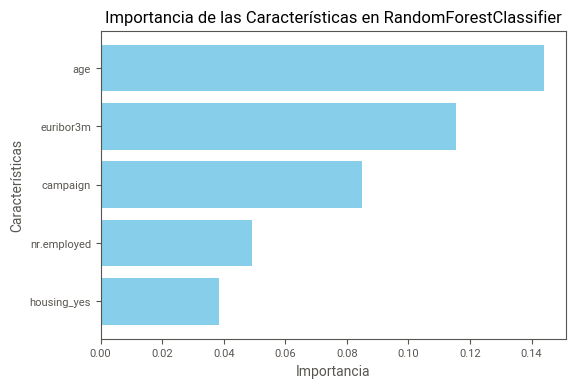

In [31]:
# Importancia de variables
importances = rf_classifier.feature_importances_

feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

top_5 = importance_df.head(5)

# Graficar
plt.figure(figsize=(6, 4))
plt.barh(top_5['Feature'], top_5['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características en RandomForestClassifier')
plt.gca().invert_yaxis()  # Para que las características más importantes aparezcan en la parte superior
plt.show()

Por la importancia de variables podemos ver que la variables "age" y "euribor3m" son muy significativas al momento de predecir, y son factores a tener en consideración.  
En tercer lugar está "campaign", lo que nos da indicio que las campañas de marketing tienen un cierto impacto en los clientes.

### LGBM

In [32]:
# Crear un dataset de LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Definir los parámetros del modelo
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31
}

# Entrenar el modelo
model = lgb.train(params, train_data, valid_sets=[test_data])

# Realizar predicciones
y_pred_prob = model.predict(X_test, num_iteration=model.best_iteration)
y_pred = (y_pred_prob >= 0.5).astype(int)  # Convertir probabilidades a etiquetas binarias

[LightGBM] [Info] Number of positive: 3248, number of negative: 25583
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 512
[LightGBM] [Info] Number of data points in the train set: 28831, number of used features: 57
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.112657 -> initscore=-2.063889
[LightGBM] [Info] Start training from score -2.063889


In [33]:
conf_matrix_lgbm = confusion_matrix(y_test, y_pred, labels=best_clf.classes_)
display( pd.DataFrame(conf_matrix_lgbm, columns=['Predicted Negative', 'Predicted Positive'], index=['True Negative', 'True Positive']))

,Predicted Negative,Predicted Positive
True Negative,10769,196
True Positive,1031,361


In [34]:
# Evaluar el modelo
f1 = f1_score(y_test, y_pred)
print(f'F1: {f1:.2f}')

F1: 0.37


Ningún modelo muestra un poder de predicción deseado

## Alternativas

- Se podría intentar mejorar los modelos mediante la optimización y búsqueda de los mejores hiperparámetros  
- Rebalancear el dataset mediante undersampling de la clase mayoritaria

## Conclusiones

- La regresión logística, teniendo la ventaja de ser un modelo de simple interpretación, tuvo un desafío debido al desequilibrio del conjunto de datos, por lo que no fue efectivo en la predicción  
- Después de probar modelos más complejos como RandomForest y LGBM, ninguno fue capaz de obtener un buen resultado.

